In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import Data 

In [25]:
df = pd.read_csv("20210103_hundenamen.csv")

In [12]:
df

,HUNDENAME,GEBURTSJAHR_HUND,GESCHLECHT_HUND
0,Ituma,2011,w
1,"""Bo"" Bendy of Treegarden",2020,m
2,"""Bobby"" Lord Sinclair",2009,m
3,"""Buddy"" Fortheringhay's J.",2011,m
4,"""Fly"" Showring i fly for you",2015,w
...,...,...,...
8569,unbekannt,2010,w
8570,unbekannt,2011,m
8571,unbekannt,2018,m
8572,unbekannt,2018,m


### Number of available dog names in the dataset 

In [14]:
df.HUNDENAME.nunique()

5192

### Visualize the counts of the top 50 frequent names in the dataset 

<BarContainer object of 50 artists>

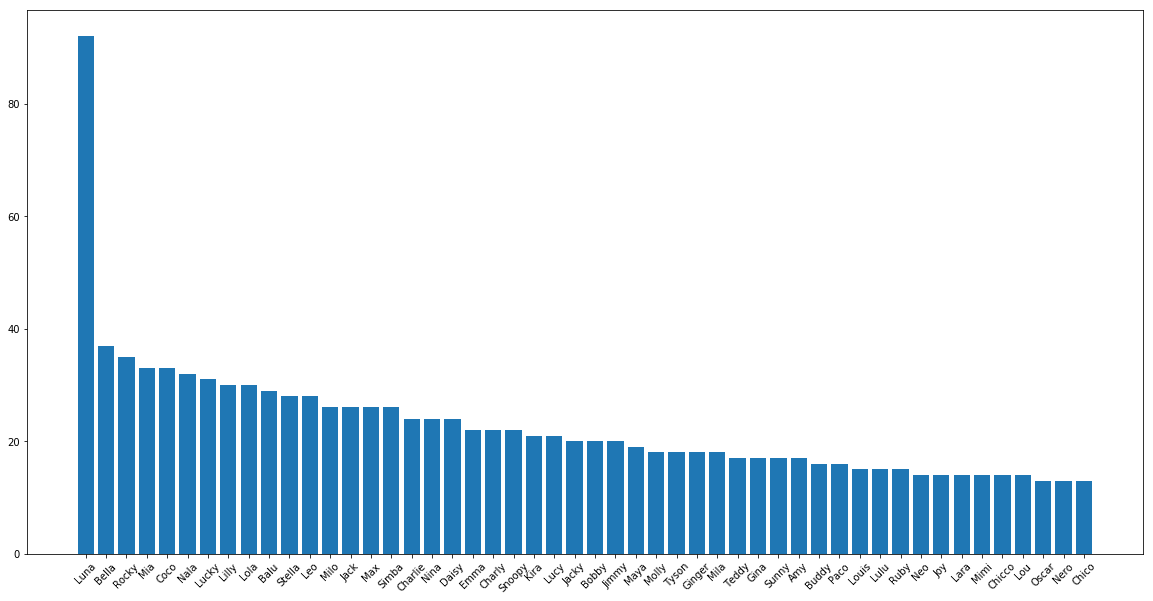

In [22]:
f, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=45)
plt.bar(df.HUNDENAME.value_counts()[:50].index, df.HUNDENAME.value_counts()[:50])

### Check for Null values 
- Calculate the null percentage for the column HUNDENAME

In [23]:
(df.isna().sum() / df.shape[0]) * 100

HUNDENAME           0.0
GEBURTSJAHR_HUND    0.0
GESCHLECHT_HUND     0.0
dtype: float64

###  The word "unbekannt" means "unknown"
- We check the number of unknown dog names in the dataset and then we delete them

In [26]:
df[df.HUNDENAME == "unbekannt"].shape[0]

5

In [27]:
df = df[df.HUNDENAME != "unbekannt"]

### Define the levenshtein distance function 

In [10]:
def levenshtein_distance(seq1, seq2):
    """
    Description:
        Calculate the Lenvenstein distance between two sequences.
    Inputs:
        seq1: the first sequence - String
        seq2: the second sequence - String
    Outputs:
        float: the Lenvenstein distance between the two input sequences
    """
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    return (matrix[size_x - 1, size_y - 1])

### Calculate the Levenshtein distance between each dog name and the word "Luca"   

In [28]:
df["lenvenstein_distance"] = df["HUNDENAME"].apply(lambda x: levenshtein("Luca", x))

### Extract the names of dogs that have a Levenshtein distance equal to 1 

In [29]:
df[df.lenvenstein_distance == 1]["HUNDENAME"].unique()

array(['Cuca', 'Lua', 'Luba', 'Lucas', 'Luce', 'Lucia', 'Lucy', 'Lula',
       'Luma', 'Luna', 'Lupa', 'Yuca'], dtype=object)